<a href="https://colab.research.google.com/github/Moutata6/DS1002-Moutata6/blob/main/Copy_of_lab1_ftx_stock_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1: Python

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. Bankman-Fried was recently found guilty on seven counts of fraud and conspiracy.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code. Point assignments are indicated for each section. There are 15 total points possible for this lab, which counts as 5% of your overall grade. There is a 1-point extra credit option at the end.

Useful reference material:
- [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook.
- [Charts Reference](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/charts-in-colaboratory.ipynb) notebook.
- [Plots Walkthrough](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/plotting-examples.ipynb)

## Group Submissions

If you are working in a group to complete this lab, you may have no more than 3 members to a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name Ameer Moutaouakil, Jack Levine               Computing ID sqw2fx, tut9yt

## 1. Load Libraries & Data (3 pts)

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [2]:
import numpy as np
import pandas as pd

In [3]:
url = 'https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv'
stockdata = pd.read_csv(url, sep = ";")
stockdata.head(4)

,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
0,2022-12-31T00:00:00.000Z,2022-12-31T23:59:59.999Z,2022-12-31T15:23:00.000Z,2022-12-31T00:21:00.000Z,0.838968,0.853502,0.835226,0.842688,3001502.06,2.771561e+08,2022-12-31T23:59:59.999Z
1,2022-12-30T00:00:00.000Z,2022-12-30T23:59:59.999Z,2022-12-30T04:22:00.000Z,2022-12-30T15:12:00.000Z,0.860193,0.864752,0.826643,0.839048,3608615.07,2.759588e+08,2022-12-30T23:59:59.999Z
2,2022-12-29T00:00:00.000Z,2022-12-29T23:59:59.999Z,2022-12-29T00:49:00.000Z,2022-12-29T21:03:00.000Z,0.885723,0.887118,0.843029,0.860231,3766979.57,2.829258e+08,2022-12-29T23:59:59.999Z
3,2022-12-28T00:00:00.000Z,2022-12-28T23:59:59.999Z,2022-12-28T00:20:00.000Z,2022-12-28T10:44:00.000Z,0.921162,0.925702,0.869842,0.886091,4192949.85,2.914310e+08,2022-12-28T23:59:59.999Z


## 2. Get Summary Data (1 pt)

In code, display how many rows and columns are in the raw dataset.

In [4]:
stockdata.shape

(741, 11)

## 3. Clean and Organize the Data (3 pts)

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`,



In [14]:
stockdata2 = stockdata.drop_duplicates()
stockdata2.head(5)

,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
0,2022-12-31T00:00:00.000Z,2022-12-31T23:59:59.999Z,2022-12-31T15:23:00.000Z,2022-12-31T00:21:00.000Z,0.838968,0.853502,0.835226,0.842688,3001502.06,2.771561e+08,2022-12-31T23:59:59.999Z
1,2022-12-30T00:00:00.000Z,2022-12-30T23:59:59.999Z,2022-12-30T04:22:00.000Z,2022-12-30T15:12:00.000Z,0.860193,0.864752,0.826643,0.839048,3608615.07,2.759588e+08,2022-12-30T23:59:59.999Z
2,2022-12-29T00:00:00.000Z,2022-12-29T23:59:59.999Z,2022-12-29T00:49:00.000Z,2022-12-29T21:03:00.000Z,0.885723,0.887118,0.843029,0.860231,3766979.57,2.829258e+08,2022-12-29T23:59:59.999Z
3,2022-12-28T00:00:00.000Z,2022-12-28T23:59:59.999Z,2022-12-28T00:20:00.000Z,2022-12-28T10:44:00.000Z,0.921162,0.925702,0.869842,0.886091,4192949.85,2.914310e+08,2022-12-28T23:59:59.999Z
4,2022-12-27T00:00:00.000Z,2022-12-27T23:59:59.999Z,2022-12-27T14:19:00.000Z,2022-12-27T19:12:00.000Z,0.931138,0.955402,0.916414,0.923668,4574953.05,3.037898e+08,2022-12-27T23:59:59.999Z


In [16]:
stockdata3 = stockdata2.dropna()
stockdata3.head(5)

,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
0,2022-12-31T00:00:00.000Z,2022-12-31T23:59:59.999Z,2022-12-31T15:23:00.000Z,2022-12-31T00:21:00.000Z,0.838968,0.853502,0.835226,0.842688,3001502.06,2.771561e+08,2022-12-31T23:59:59.999Z
1,2022-12-30T00:00:00.000Z,2022-12-30T23:59:59.999Z,2022-12-30T04:22:00.000Z,2022-12-30T15:12:00.000Z,0.860193,0.864752,0.826643,0.839048,3608615.07,2.759588e+08,2022-12-30T23:59:59.999Z
2,2022-12-29T00:00:00.000Z,2022-12-29T23:59:59.999Z,2022-12-29T00:49:00.000Z,2022-12-29T21:03:00.000Z,0.885723,0.887118,0.843029,0.860231,3766979.57,2.829258e+08,2022-12-29T23:59:59.999Z
3,2022-12-28T00:00:00.000Z,2022-12-28T23:59:59.999Z,2022-12-28T00:20:00.000Z,2022-12-28T10:44:00.000Z,0.921162,0.925702,0.869842,0.886091,4192949.85,2.914310e+08,2022-12-28T23:59:59.999Z
4,2022-12-27T00:00:00.000Z,2022-12-27T23:59:59.999Z,2022-12-27T14:19:00.000Z,2022-12-27T19:12:00.000Z,0.931138,0.955402,0.916414,0.923668,4574953.05,3.037898e+08,2022-12-27T23:59:59.999Z


In [21]:
stockdata4 = stockdata3.sort_values(by = 'timestamp', ascending = True)
stockdata4.head(5)

,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
739,2021-01-03T00:00:00.000Z,2021-01-03T23:59:59.999Z,2021-01-03T16:25:03.000Z,2021-01-03T00:25:03.000Z,6.201133,7.007523,6.171834,6.923968,31046652.87,6.532553e+08,2021-01-03T23:59:59.999Z
738,2021-01-04T00:00:00.000Z,2021-01-04T23:59:59.999Z,2021-01-04T06:40:03.000Z,2021-01-04T10:18:03.000Z,6.948680,7.632146,6.358218,7.514079,40526109.15,7.089305e+08,2021-01-04T23:59:59.999Z
737,2021-01-05T00:00:00.000Z,2021-01-05T23:59:59.999Z,2021-01-05T22:44:03.000Z,2021-01-05T06:19:03.000Z,7.528216,8.714947,7.081120,8.664688,49479278.39,8.174869e+08,2021-01-05T23:59:59.999Z
736,2021-01-06T00:00:00.000Z,2021-01-06T23:59:59.999Z,2021-01-06T23:59:03.000Z,2021-01-06T01:41:03.000Z,8.671285,9.390797,8.425946,9.390797,31404627.93,8.859932e+08,2021-01-06T23:59:59.999Z
735,2021-01-07T00:00:00.000Z,2021-01-07T23:59:59.999Z,2021-01-07T17:59:03.000Z,2021-01-07T08:25:03.000Z,9.386493,10.004872,9.215244,9.562131,46303336.73,9.021580e+08,2021-01-07T23:59:59.999Z


In [56]:
columns_to_drop = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap']
stockdata5 = stockdata4.drop(columns=columns_to_drop)
stockdata5.head(5)

,open,high,low,close,volume,timestamp
739,6.201133,7.007523,6.171834,6.923968,31046652.87,2021-01-03T23:59:59.999Z
738,6.948680,7.632146,6.358218,7.514079,40526109.15,2021-01-04T23:59:59.999Z
737,7.528216,8.714947,7.081120,8.664688,49479278.39,2021-01-05T23:59:59.999Z
736,8.671285,9.390797,8.425946,9.390797,31404627.93,2021-01-06T23:59:59.999Z
735,9.386493,10.004872,9.215244,9.562131,46303336.73,2021-01-07T23:59:59.999Z


Now display the first 10 rows of the cleaned dataset.

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
stockdata5.head(10)

,open,high,low,close,volume,timestamp
739,6.201133,7.007523,6.171834,6.923968,3.104665e+07,2021-01-03T23:59:59.999Z
738,6.948680,7.632146,6.358218,7.514079,4.052611e+07,2021-01-04T23:59:59.999Z
737,7.528216,8.714947,7.081120,8.664688,4.947928e+07,2021-01-05T23:59:59.999Z
736,8.671285,9.390797,8.425946,9.390797,3.140463e+07,2021-01-06T23:59:59.999Z
735,9.386493,10.004872,9.215244,9.562131,4.630334e+07,2021-01-07T23:59:59.999Z
734,9.569239,9.726429,8.452265,9.380988,4.228627e+07,2021-01-08T23:59:59.999Z
733,9.370450,9.636120,8.728044,9.570511,2.849895e+07,2021-01-09T23:59:59.999Z
732,9.571917,9.944797,8.657147,9.308809,3.101239e+07,2021-01-10T23:59:59.999Z
731,9.298315,9.298315,7.126050,8.610997,1.013024e+08,2021-01-11T23:59:59.999Z
730,8.615143,9.097479,8.040916,8.381133,2.674536e+07,2021-01-12T23:59:59.999Z


## 4. Calculate Daily Gains/Losses (2 pts)

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Reference code for this is available in the [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook. Hint: It is not complicated and does not require a for-loop.

In [67]:
stockdata5['close'] = pd.to_numeric(stockdata5['close'], errors='coerce')
stockdata5['open'] = pd.to_numeric(stockdata5['open'], errors='coerce')
stockdata5['close_change'] = stockdata5['close'] - stockdata5['open']
stockdata5.head(10)

,open,high,low,close,volume,timestamp,close_change
739,6.201133,7.007523,6.171834,6.923968,3.104665e+07,2021-01-03T23:59:59.999Z,0.722836
738,6.948680,7.632146,6.358218,7.514079,4.052611e+07,2021-01-04T23:59:59.999Z,0.565399
737,7.528216,8.714947,7.081120,8.664688,4.947928e+07,2021-01-05T23:59:59.999Z,1.136471
736,8.671285,9.390797,8.425946,9.390797,3.140463e+07,2021-01-06T23:59:59.999Z,0.719512
735,9.386493,10.004872,9.215244,9.562131,4.630334e+07,2021-01-07T23:59:59.999Z,0.175638
734,9.569239,9.726429,8.452265,9.380988,4.228627e+07,2021-01-08T23:59:59.999Z,-0.188250
733,9.370450,9.636120,8.728044,9.570511,2.849895e+07,2021-01-09T23:59:59.999Z,0.200061
732,9.571917,9.944797,8.657147,9.308809,3.101239e+07,2021-01-10T23:59:59.999Z,-0.263108
731,9.298315,9.298315,7.126050,8.610997,1.013024e+08,2021-01-11T23:59:59.999Z,-0.687319
730,8.615143,9.097479,8.040916,8.381133,2.674536e+07,2021-01-12T23:59:59.999Z,-0.234010


## 5. Identify Growth Days (1 pt)

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [77]:
stockdata5 = stockdata5.sort_values(['close_change'], ascending = False)
stockdata5.head(10)

,open,high,low,close,volume,timestamp,close_change,rate_of_change
492,48.511426,65.970515,47.177669,65.181877,1.743544e+09,2021-09-01T23:59:59.999Z,16.670451,0.343640
487,63.527662,77.351114,62.268965,73.347876,2.040937e+09,2021-09-06T23:59:59.999Z,9.820214,0.154582
692,26.254523,34.601007,26.254523,34.577106,2.767550e+08,2021-02-19T23:59:59.999Z,8.322583,0.316996
592,27.003012,33.723822,27.003012,33.404150,1.677276e+08,2021-05-24T23:59:59.999Z,6.401138,0.237053
673,32.013785,37.566227,31.849448,37.532879,1.513847e+08,2021-03-09T23:59:59.999Z,5.519094,0.172397
515,43.588232,49.457371,41.870726,48.892233,1.948272e+08,2021-08-09T23:59:59.999Z,5.304001,0.121684
485,70.990536,78.626754,61.990467,76.188545,2.855900e+09,2021-09-08T23:59:59.999Z,5.198009,0.073221
611,53.798787,58.515094,53.450072,58.496713,1.256225e+08,2021-05-05T23:59:59.999Z,4.697926,0.087324
470,51.288907,58.100866,50.820020,55.829700,7.432037e+08,2021-09-22T23:59:59.999Z,4.540793,0.088534
625,46.423056,51.315860,46.273925,50.871603,1.430288e+08,2021-04-26T23:59:59.999Z,4.448547,0.095826


## 6. Calculate the % Rate of Change (2 pts)

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [78]:
stockdata5["rate_of_change"] = (stockdata5['close_change'])/stockdata5['open']
stockdata5.head(5)

,open,high,low,close,volume,timestamp,close_change,rate_of_change
492,48.511426,65.970515,47.177669,65.181877,1.743544e+09,2021-09-01T23:59:59.999Z,16.670451,0.343640
487,63.527662,77.351114,62.268965,73.347876,2.040937e+09,2021-09-06T23:59:59.999Z,9.820214,0.154582
692,26.254523,34.601007,26.254523,34.577106,2.767550e+08,2021-02-19T23:59:59.999Z,8.322583,0.316996
592,27.003012,33.723822,27.003012,33.404150,1.677276e+08,2021-05-24T23:59:59.999Z,6.401138,0.237053
673,32.013785,37.566227,31.849448,37.532879,1.513847e+08,2021-03-09T23:59:59.999Z,5.519094,0.172397


## 7. Identify Greatest % Change Days (1 pt)

Based on the rate change column calculated above, identify the top 5 days of greatest rate changes, whether positive or negative.

Display your results in a table showing both the rate of change and their dates.

In [79]:
stockdata5 = stockdata5.sort_values(['rate_of_change'], ascending = False)
stockdata5.head(5)

,open,high,low,close,volume,timestamp,close_change,rate_of_change
53,2.286410,4.202124,2.142760,3.516938,9.893206e+08,2022-11-10T23:59:59.999Z,1.230529,0.538193
492,48.511426,65.970515,47.177669,65.181877,1.743544e+09,2021-09-01T23:59:59.999Z,16.670451,0.343640
692,26.254523,34.601007,26.254523,34.577106,2.767550e+08,2021-02-19T23:59:59.999Z,8.322583,0.316996
24,1.364261,1.905007,1.327899,1.700540,7.826265e+07,2022-12-09T23:59:59.999Z,0.336278,0.246491
48,1.474274,1.991792,1.407320,1.835913,1.212039e+08,2022-11-15T23:59:59.999Z,0.361639,0.245300


## 8. Plot the Data (2 pts)

Finally, create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

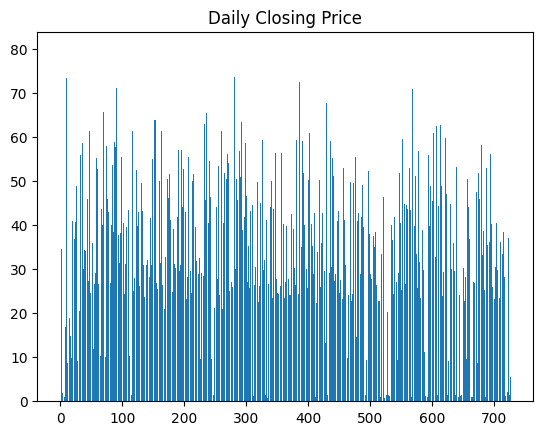

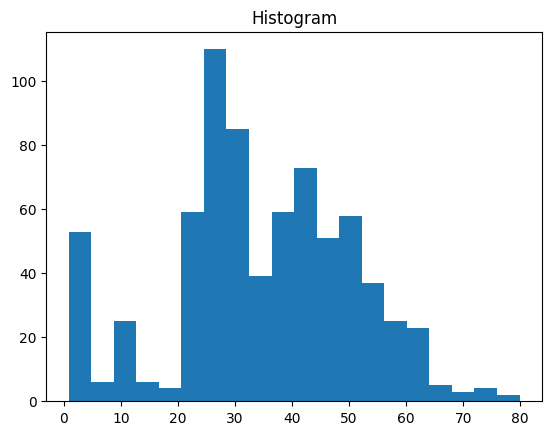

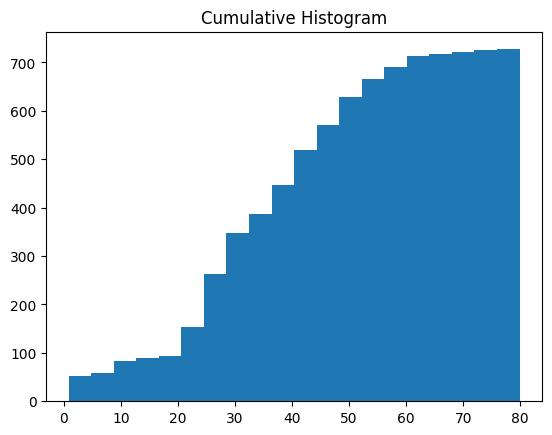

In [81]:
from os import close
import matplotlib.pyplot as plt
import numpy as np

# Use numpy to generate a bunch of random data in a bell curve around 5.
n = stockdata5['close']

m = [m for m in range(len(n))]
plt.bar(m, n)
plt.title("Daily Closing Price")
plt.show()

plt.hist(n, bins=20)
plt.title("Histogram")
plt.show()

plt.hist(n, cumulative=True, bins=20)
plt.title("Cumulative Histogram")
plt.show()

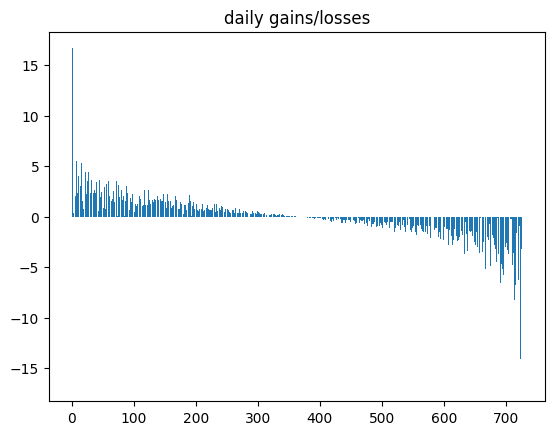

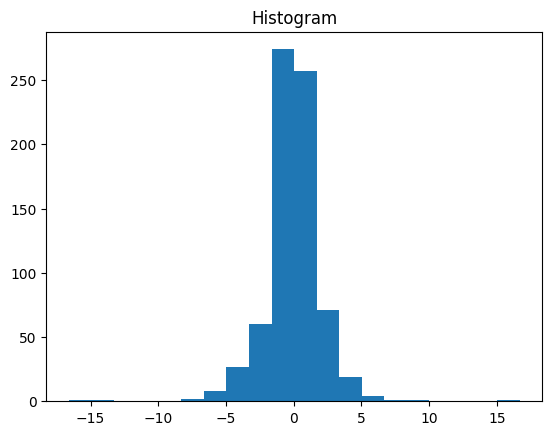

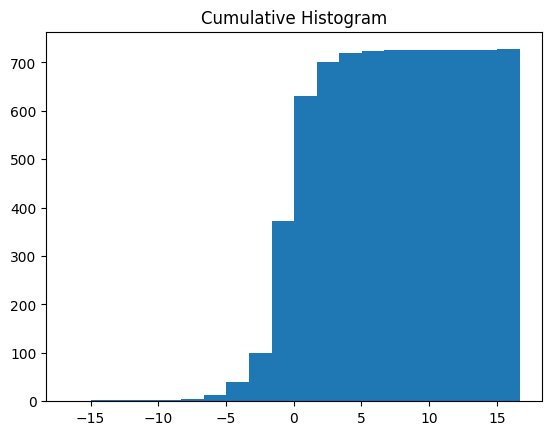

In [82]:
from os import close
import matplotlib.pyplot as plt
import numpy as np

# Use numpy to generate a bunch of random data in a bell curve around 5.
n = stockdata5['close_change']

m = [m for m in range(len(n))]
plt.bar(m, n)
plt.title("daily gains/losses")
plt.show()

plt.hist(n, bins=20)
plt.title("Histogram")
plt.show()

plt.hist(n, cumulative=True, bins=20)
plt.title("Cumulative Histogram")
plt.show()

## BONUS! (1 pt)

Combine the two plots from #8 above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

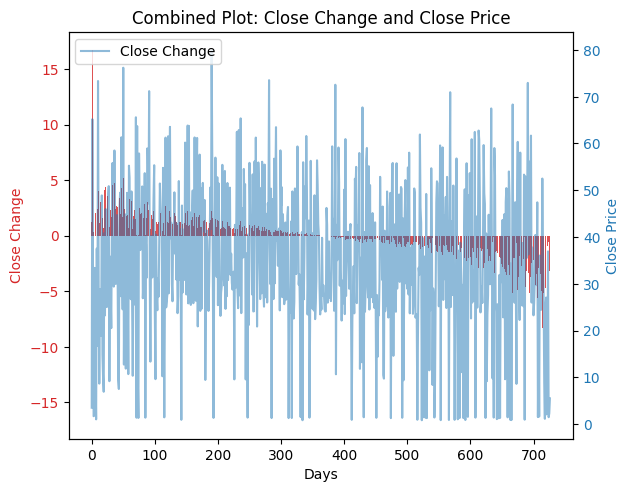

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for the example
close_change = stockdata5['close_change']
close_price = stockdata5['close']

# Plot the bar chart for close_change
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Days')
ax1.set_ylabel('Close Change', color=color)
ax1.bar(range(len(close_change)), close_change, color=color, alpha=0.8)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second Y-axis for close_price
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Close Price', color=color)
ax2.plot(range(len(close_price)), close_price, color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

# Display a legend
fig.tight_layout()
plt.legend(['Close Change', 'Close Price'], loc='upper left')

plt.title('Combined Plot: Close Change and Close Price')
plt.show()